# First Neurons

In [31]:
import numpy as np
import tensorflow as tf

Setting the Random seeds for numpy and TF

In [32]:
np.random.seed(101)
tf.set_random_seed(101)

Making and Setting Data

In [33]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [34]:
rand_b = np.random.uniform(0, 100, (5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

#### Placeholders

In [35]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

#### Operations

In [36]:
add_op = a + b
mul_op = a * b

### Running Sessions to Create Graphs with feed dictionaries

In [37]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict = {a: rand_a, b: rand_b})
    print(add_result)
    
    print('\n')
    
    mul_result = sess.run(mul_op, feed_dict = {a: rand_a, b: rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Example Neural Network

In [38]:
n_features = 10
n_dense_neuron = 3 #No. of output nodes

In [39]:
x = tf.placeholder(tf.float32, shape = (None, n_features))

In [40]:
#Bias and Weight

w = tf.Variable(initial_value= tf.random_normal([n_features, n_dense_neuron]))
#We use dimensions as per Transpose

b = tf.Variable(tf.zeros(n_dense_neuron))

#### Operation Activation Function

In [41]:
xW = tf.matmul(x, w)

In [42]:
z = tf.add(xW, b)

Other Squashing functions are also present  
* **Rectilinear**        - tf . nn . relu 
* **Hyperbolic Tangent** - tf . tanh

In [43]:
a = tf.sigmoid(z)

In [44]:
#Variable Initializer
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict = {x: np.random.random(size = [1, n_features])})

In [46]:
print(layer_out)

[[0.9143716 0.7156127 0.5995944]]


We didn't updated weights here

## Basic Regression Example

To solve the equation

y = mx + b

y will be the y_labels and x is the x_data. The aim to figure out the slope and the intercept for the line that best fits our data!

### Making Data

In [48]:
x_data = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, size = (10))
x_data

array([1.5420333 , 2.06464458, 1.63019008, 3.17180981, 5.22561526,
       4.86130098, 7.00035014, 6.9140287 , 7.6584252 , 9.03483077])

In [49]:
y_label = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, size = (10))
y_label

array([ 0.82710439,  3.13276197,  4.34779239,  3.93450225,  4.88335803,
        6.41186709,  6.47382399,  6.85273428,  7.65330299, 10.41297596])

In [50]:
import matplotlib.pyplot as plt

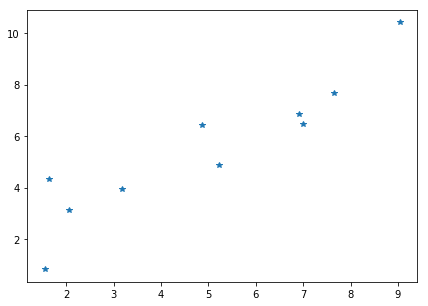

In [58]:
plt.figure(figsize= (7,5))
plt.plot(x_data, y_label, '*',)

In [59]:
#randomising m and b
np.random.random(2)

array([0.81226589, 0.67026042])

In [60]:
m = tf.Variable(initial_value= 0.81)
b = tf.Variable(initial_value= 0.67)

### Cost Function

In [67]:
error = 0
for x,y in zip(x_data, y_label):
        
        y_pred = m*x + b
        
        error = error + ((y - y_pred)**2)


### Optimizer

In [70]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

#### Inititalizing Globals

In [71]:
init = tf.global_variables_initializer()

### Session and Run

In [72]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        
    final_slope, final_bias = sess.run([m, b])

In [73]:
final_slope

0.94018376

In [74]:
final_bias

0.8242718

### Evaluating Results

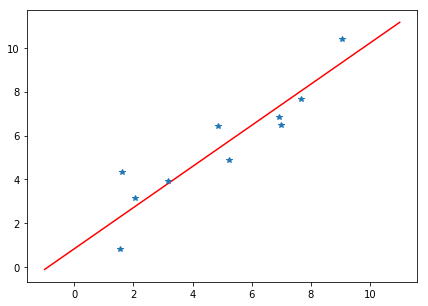

In [87]:
plt.figure(figsize= (7,5))

x_test = np.linspace(-1,11,10)

y_pred_plot = (final_slope * x_test) + final_bias

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*',)

### Voila!